# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [58]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [61]:
load_dotenv()

True

In [62]:
# Read your api key environment variable
news_api_key = os.getenv("news_api")

In [63]:
print(news_api_key)

c6de8635ebd04f87b4981db6ba1ba2cc


In [64]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [65]:
# Creating a function to collect news articles, create sentiment analysis and dataframe with everything in it

def news_dataframe(topic):
    news = newsapi.get_everything(q='{topic}',
                #sources='bbc-news,the-verge',
                domains='bbc.co.uk,techcrunch.com',
                from_param='2021-08-014',
                to='2021-09-14',
                language='en',
                sort_by='relevancy',
                page=2)

    
    articles = []
    for article in news['articles']:
        try:
            sentiment = sid.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": sentiment["compound"],
                "positive": sentiment["pos"],
                "negative": sentiment["neg"],
                "neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)

In [66]:
# all_articles = newsapi.get_everything(q='bitcoin',
#                                       sources='bbc-news,the-verge',
#                                       domains='bbc.co.uk,techcrunch.com',
#                                       from_param='2021-08-014',
#                                       to='2021-09-14',
#                                       language='en',
#                                       sort_by='relevancy',
#                                       page=2)

# Run function for ethereum and bitcoin
ethereum_articles = news_dataframe('ethereum')
bitcoin_articles = news_dataframe('bitcoin')

In [67]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = news_dataframe('ethereum')
ethereum_articles.head()

title  \
0  'I care about the climate but my dad works in ...   
1  Flipboard rolls out newsfeed personalization t...   
2  Canada federal election: Key takeaways from th...   
3  Social network Peanut expands to include more ...   
4  Here are all the companies from Y Combinator’s...   

                                         description  \
0  Stephanie worries about climate change, but he...   
1  Facebook is preparing to adjust its News Feed ...   
2  Five party leaders made their pitch on leaders...   
3  Now, that will include menopause, as well -- a...   
4  Nearly 50% of YC startups are based outside of...   

                                                text        date  compound  \
0  Stephanie is concerned about the impact burnin...  2021-09-11   -0.2263   
1  Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
2  By Jessica MurphyBBC News, Toronto\r\nCanadian...  2021-09-10    0.4019   
3  Peanut, a social networking app for women, ini...  2021-09-07    0.6059   
4  Today Y Combinator kicked off the Demo Day cyc...  2021-08-31    0.4215   

   positive  negative  neutral  
0     0.000     0.137    0.863  
1     0.000     0.000    1.000  
2     0.184     0.000    0.816  
3     0.177     0.000    0.823  
4     0.097     0.000    0.903

In [68]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_articles.head()

title  \
0  'I care about the climate but my dad works in ...   
1  Flipboard rolls out newsfeed personalization t...   
2  Canada federal election: Key takeaways from th...   
3  Social network Peanut expands to include more ...   
4  Here are all the companies from Y Combinator’s...   

                                         description  \
0  Stephanie worries about climate change, but he...   
1  Facebook is preparing to adjust its News Feed ...   
2  Five party leaders made their pitch on leaders...   
3  Now, that will include menopause, as well -- a...   
4  Nearly 50% of YC startups are based outside of...   

                                                text        date  compound  \
0  Stephanie is concerned about the impact burnin...  2021-09-11   -0.2263   
1  Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
2  By Jessica MurphyBBC News, Toronto\r\nCanadian...  2021-09-10    0.4019   
3  Peanut, a social networking app for women, ini...  2021-09-07    0.6059   
4  Today Y Combinator kicked off the Demo Day cyc...  2021-08-31    0.4215   

   positive  negative  neutral  
0     0.000     0.137    0.863  
1     0.000     0.000    1.000  
2     0.184     0.000    0.816  
3     0.177     0.000    0.823  
4     0.097     0.000    0.903

In [69]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_articles.head()

title  \
0  'I care about the climate but my dad works in ...   
1  Flipboard rolls out newsfeed personalization t...   
2  Canada federal election: Key takeaways from th...   
3  Social network Peanut expands to include more ...   
4  Here are all the companies from Y Combinator’s...   

                                         description  \
0  Stephanie worries about climate change, but he...   
1  Facebook is preparing to adjust its News Feed ...   
2  Five party leaders made their pitch on leaders...   
3  Now, that will include menopause, as well -- a...   
4  Nearly 50% of YC startups are based outside of...   

                                                text        date  compound  \
0  Stephanie is concerned about the impact burnin...  2021-09-11   -0.2263   
1  Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
2  By Jessica MurphyBBC News, Toronto\r\nCanadian...  2021-09-10    0.4019   
3  Peanut, a social networking app for women, ini...  2021-09-07    0.6059   
4  Today Y Combinator kicked off the Demo Day cyc...  2021-08-31    0.4215   

   positive  negative  neutral  
0     0.000     0.137    0.863  
1     0.000     0.000    1.000  
2     0.184     0.000    0.816  
3     0.177     0.000    0.823  
4     0.097     0.000    0.903

In [70]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_articles.describe()

compound   positive   negative    neutral
count  12.000000  12.000000  12.000000  12.000000
mean    0.143825   0.052917   0.023000   0.924083
std     0.303097   0.068784   0.041816   0.063760
min    -0.250000   0.000000   0.000000   0.816000
25%    -0.044475   0.000000   0.000000   0.893000
50%     0.025800   0.019500   0.000000   0.931000
75%     0.426225   0.077500   0.036500   0.967000
max     0.605900   0.184000   0.137000   1.000000

In [71]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_articles.describe()

compound   positive   negative    neutral
count  12.000000  12.000000  12.000000  12.000000
mean    0.143825   0.052917   0.023000   0.924083
std     0.303097   0.068784   0.041816   0.063760
min    -0.250000   0.000000   0.000000   0.816000
25%    -0.044475   0.000000   0.000000   0.893000
50%     0.025800   0.019500   0.000000   0.931000
75%     0.426225   0.077500   0.036500   0.967000
max     0.605900   0.184000   0.137000   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [85]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [73]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()


# Create a list of stopwords
# YOUR CODE HERE!
print(stopwords.words('english'))


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [83]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens
# Remove the punctuation from text   
# Create a tokenized list of the words   
# Lemmatize words into root words  
# Convert the words to lowercase        
# Remove the stop words    

In [86]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_articles['tokens'] = bitcoin_articles.apply(lambda x : tokenizer(x['description']), axis=1)
bitcoin_articles

title  \
0   'I care about the climate but my dad works in ...   
1   Flipboard rolls out newsfeed personalization t...   
2   Canada federal election: Key takeaways from th...   
3   Social network Peanut expands to include more ...   
4   Here are all the companies from Y Combinator’s...   
5   UK dials up the spin on data reform, claiming ...   
6   Answers to your questions about Covid in Scotland   
7   Apple prohibited from blocking outside payment...   
8   Flipboard rolls out newsfeed personalization t...   
9   WhatsApp will finally let users encrypt their ...   
10  Epic trial forces App Store changes, Android 1...   
11  Here are all the companies from Y Combinator’s...   

                                          description  \
0   Stephanie worries about climate change, but he...   
1   Facebook is preparing to adjust its News Feed ...   
2   Five party leaders made their pitch on leaders...   
3   Now, that will include menopause, as well -- a...   
4   Nearly 50% of YC startups are based outside of...   
5   The U.K. government has announced a consultati...   
6   BBC Scotland asked readers to send in what the...   
7   A judge this morning issued a ruling in Califo...   
8   Facebook is preparing to adjust its News Feed ...   
9   WhatsApp said on Friday it will give its two b...   
10  Welcome back to This Week in Apps, the weekly ...   
11  Today Y Combinator kicked off the Demo Day cyc...   

                                                 text        date  compound  \
0   Stephanie is concerned about the impact burnin...  2021-09-11   -0.2263   
1   Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
2   By Jessica MurphyBBC News, Toronto\r\nCanadian...  2021-09-10    0.4019   
3   Peanut, a social networking app for women, ini...  2021-09-07    0.6059   
4   Today Y Combinator kicked off the Demo Day cyc...  2021-08-31    0.4215   
5   The U.K. government has announced a consultati...  2021-09-09   -0.1779   
6   By Paul O'HareBBC Scotland\r\nBBC Scotland has...  2021-09-14    0.0000   
7   A judge this morning issued a ruling in Califo...  2021-09-10    0.4404   
8   Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
9   WhatsApp said on Friday it will give its two b...  2021-09-10    0.0516   
10  Welcome back to This Week in Apps, the weekly ...  2021-09-11    0.4588   
11  Today Y Combinator kicked off the Demo Day cyc...  2021-08-31   -0.2500   

    positive  negative  neutral  \
0      0.000     0.137    0.863   
1      0.000     0.000    1.000   
2      0.184     0.000    0.816   
3      0.177     0.000    0.823   
4      0.097     0.000    0.903   
5      0.000     0.061    0.939   
6      0.000     0.000    1.000   
7      0.071     0.000    0.929   
8      0.000     0.000    1.000   
9      0.039     0.034    0.927   
10     0.067     0.000    0.933   
11     0.000     0.044    0.956   

                                               tokens  
0   stephanie, worry, climate, change, dad, senior...  
1   facebook, preparing, adjust, news, feed, deemp...  
2   five, party, leader, made, pitch, leadership, ...  
3   include, menopause, well, life, stage, impact,...  
4   nearly, yc, startup, based, outside, united, s...  
5   uk, government, announced, consultation, plan,...  
6   bbc, scotland, asked, reader, send, wanted, kn...  
7   judge, morning, issued, ruling, california, ep...  
8   facebook, preparing, adjust, news, feed, deemp...  
9   whatsapp, said, friday, give, two, billion, us...  
10  welcome, back, week, inappsthe, weekly, techcr...  
11  today, combinator, kicked, demo, day, cycle, s...

In [88]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_articles['tokens'] = ethereum_articles.apply(lambda x : tokenizer(x['description']), axis=1)
ethereum_articles

title  \
0   'I care about the climate but my dad works in ...   
1   Flipboard rolls out newsfeed personalization t...   
2   Canada federal election: Key takeaways from th...   
3   Social network Peanut expands to include more ...   
4   Here are all the companies from Y Combinator’s...   
5   UK dials up the spin on data reform, claiming ...   
6   Answers to your questions about Covid in Scotland   
7   Apple prohibited from blocking outside payment...   
8   Flipboard rolls out newsfeed personalization t...   
9   WhatsApp will finally let users encrypt their ...   
10  Epic trial forces App Store changes, Android 1...   
11  Here are all the companies from Y Combinator’s...   

                                          description  \
0   Stephanie worries about climate change, but he...   
1   Facebook is preparing to adjust its News Feed ...   
2   Five party leaders made their pitch on leaders...   
3   Now, that will include menopause, as well -- a...   
4   Nearly 50% of YC startups are based outside of...   
5   The U.K. government has announced a consultati...   
6   BBC Scotland asked readers to send in what the...   
7   A judge this morning issued a ruling in Califo...   
8   Facebook is preparing to adjust its News Feed ...   
9   WhatsApp said on Friday it will give its two b...   
10  Welcome back to This Week in Apps, the weekly ...   
11  Today Y Combinator kicked off the Demo Day cyc...   

                                                 text        date  compound  \
0   Stephanie is concerned about the impact burnin...  2021-09-11   -0.2263   
1   Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
2   By Jessica MurphyBBC News, Toronto\r\nCanadian...  2021-09-10    0.4019   
3   Peanut, a social networking app for women, ini...  2021-09-07    0.6059   
4   Today Y Combinator kicked off the Demo Day cyc...  2021-08-31    0.4215   
5   The U.K. government has announced a consultati...  2021-09-09   -0.1779   
6   By Paul O'HareBBC Scotland\r\nBBC Scotland has...  2021-09-14    0.0000   
7   A judge this morning issued a ruling in Califo...  2021-09-10    0.4404   
8   Facebook is preparing to adjust its News Feed ...  2021-08-31    0.0000   
9   WhatsApp said on Friday it will give its two b...  2021-09-10    0.0516   
10  Welcome back to This Week in Apps, the weekly ...  2021-09-11    0.4588   
11  Today Y Combinator kicked off the Demo Day cyc...  2021-08-31   -0.2500   

    positive  negative  neutral  \
0      0.000     0.137    0.863   
1      0.000     0.000    1.000   
2      0.184     0.000    0.816   
3      0.177     0.000    0.823   
4      0.097     0.000    0.903   
5      0.000     0.061    0.939   
6      0.000     0.000    1.000   
7      0.071     0.000    0.929   
8      0.000     0.000    1.000   
9      0.039     0.034    0.927   
10     0.067     0.000    0.933   
11     0.000     0.044    0.956   

                                               tokens  
0   stephanie, worry, climate, change, dad, senior...  
1   facebook, preparing, adjust, news, feed, deemp...  
2   five, party, leader, made, pitch, leadership, ...  
3   include, menopause, well, life, stage, impact,...  
4   nearly, yc, startup, based, outside, united, s...  
5   uk, government, announced, consultation, plan,...  
6   bbc, scotland, asked, reader, send, wanted, kn...  
7   judge, morning, issued, ruling, california, ep...  
8   facebook, preparing, adjust, news, feed, deemp...  
9   whatsapp, said, friday, give, two, billion, us...  
10  welcome, back, week, inappsthe, weekly, techcr...  
11  today, combinator, kicked, demo, day, cycle, s...

In [ ]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [90]:
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
#import janitor as jn
#import ConfigParser

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [92]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(bitcoin_articles['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
btc_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
btc_df_freq_2 = btc_df_freq_2.sort_values(by='frequency', ascending=False)
btc_df_freq_2.head(10)


frequency
current event               2
post current                2
flipboard instead           2
facebook preparing          2
preparing adjust            2
news reader                 2
event news                  2
news feed                   2
feed deemphasize            2
instead rolling             2

In [100]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(ethereum_articles['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
eth_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
eth_df_freq_2 = eth_df_freq_2.sort_values(by='frequency', ascending=False)
eth_df_freq_2.head(10)

frequency
current event               2
post current                2
flipboard instead           2
facebook preparing          2
preparing adjust            2
news reader                 2
event news                  2
news feed                   2
feed deemphasize            2
instead rolling             2

In [104]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [108]:
#join all text in tokens column into 1 string
corpus_btc = bitcoin_articles['tokens'].str.cat(sep=', ')
corpus_eth = ethereum_articles['tokens'].str.cat(sep=', ')

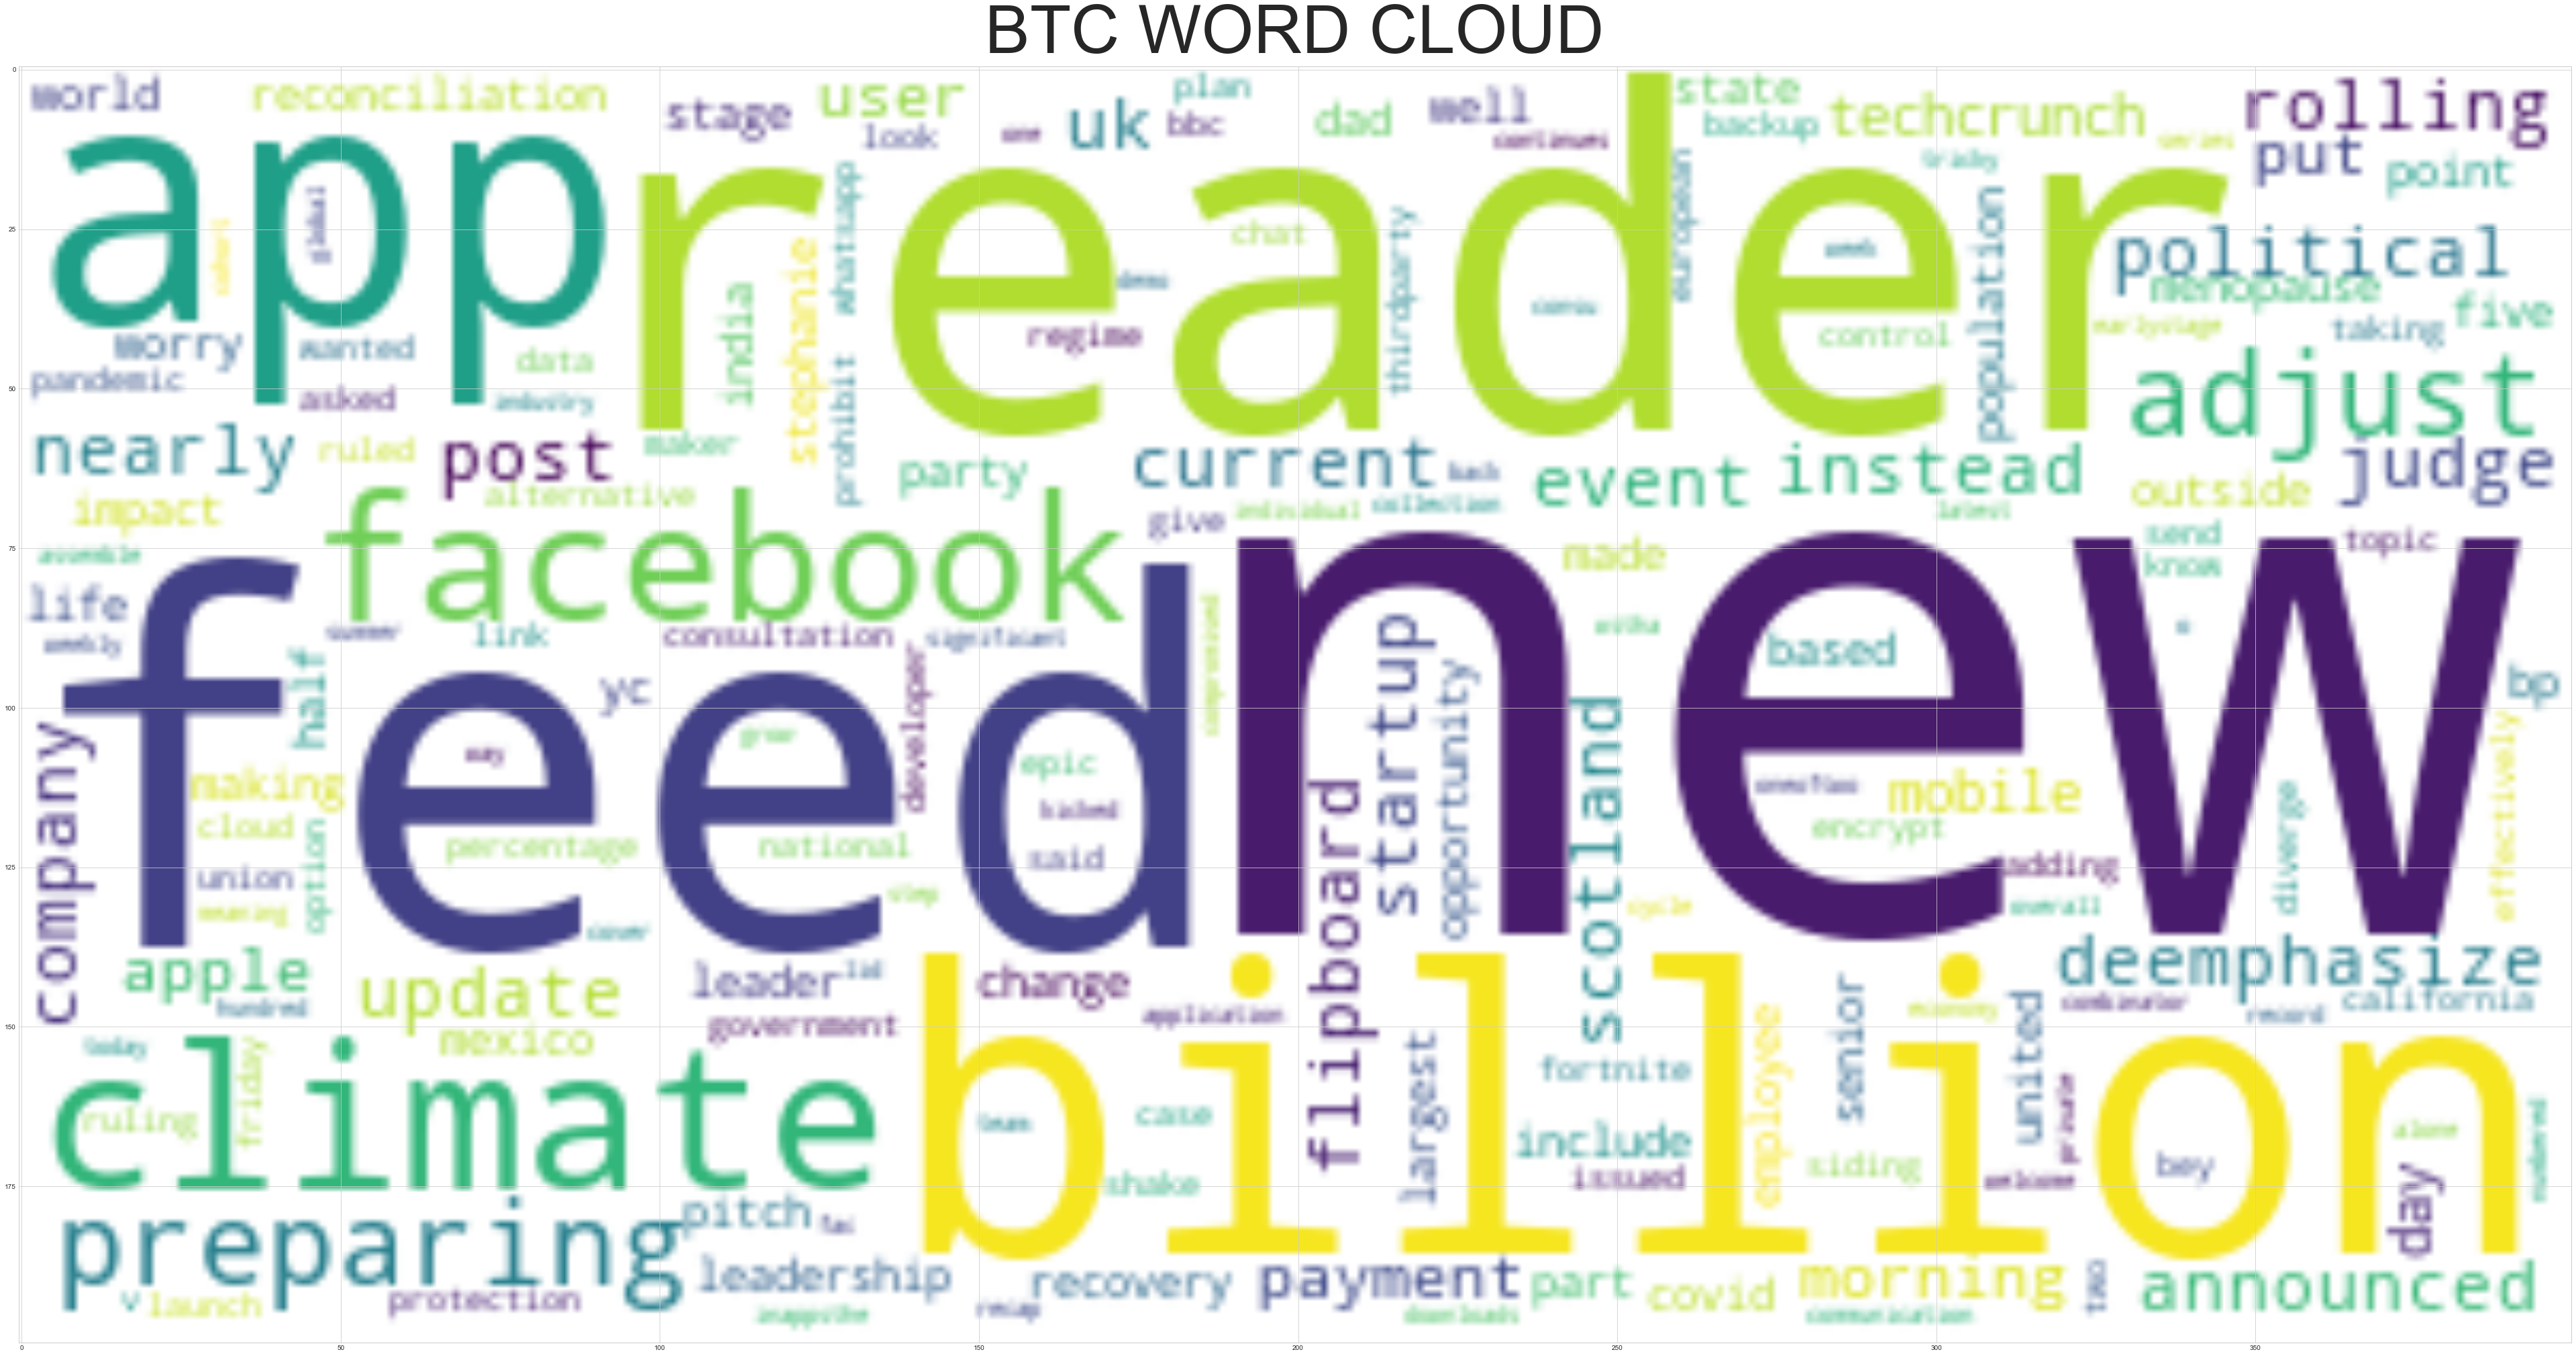

In [109]:
# Generate the Bitcoin word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_btc)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("BTC WORD CLOUD",fontsize=100)
plt.show()

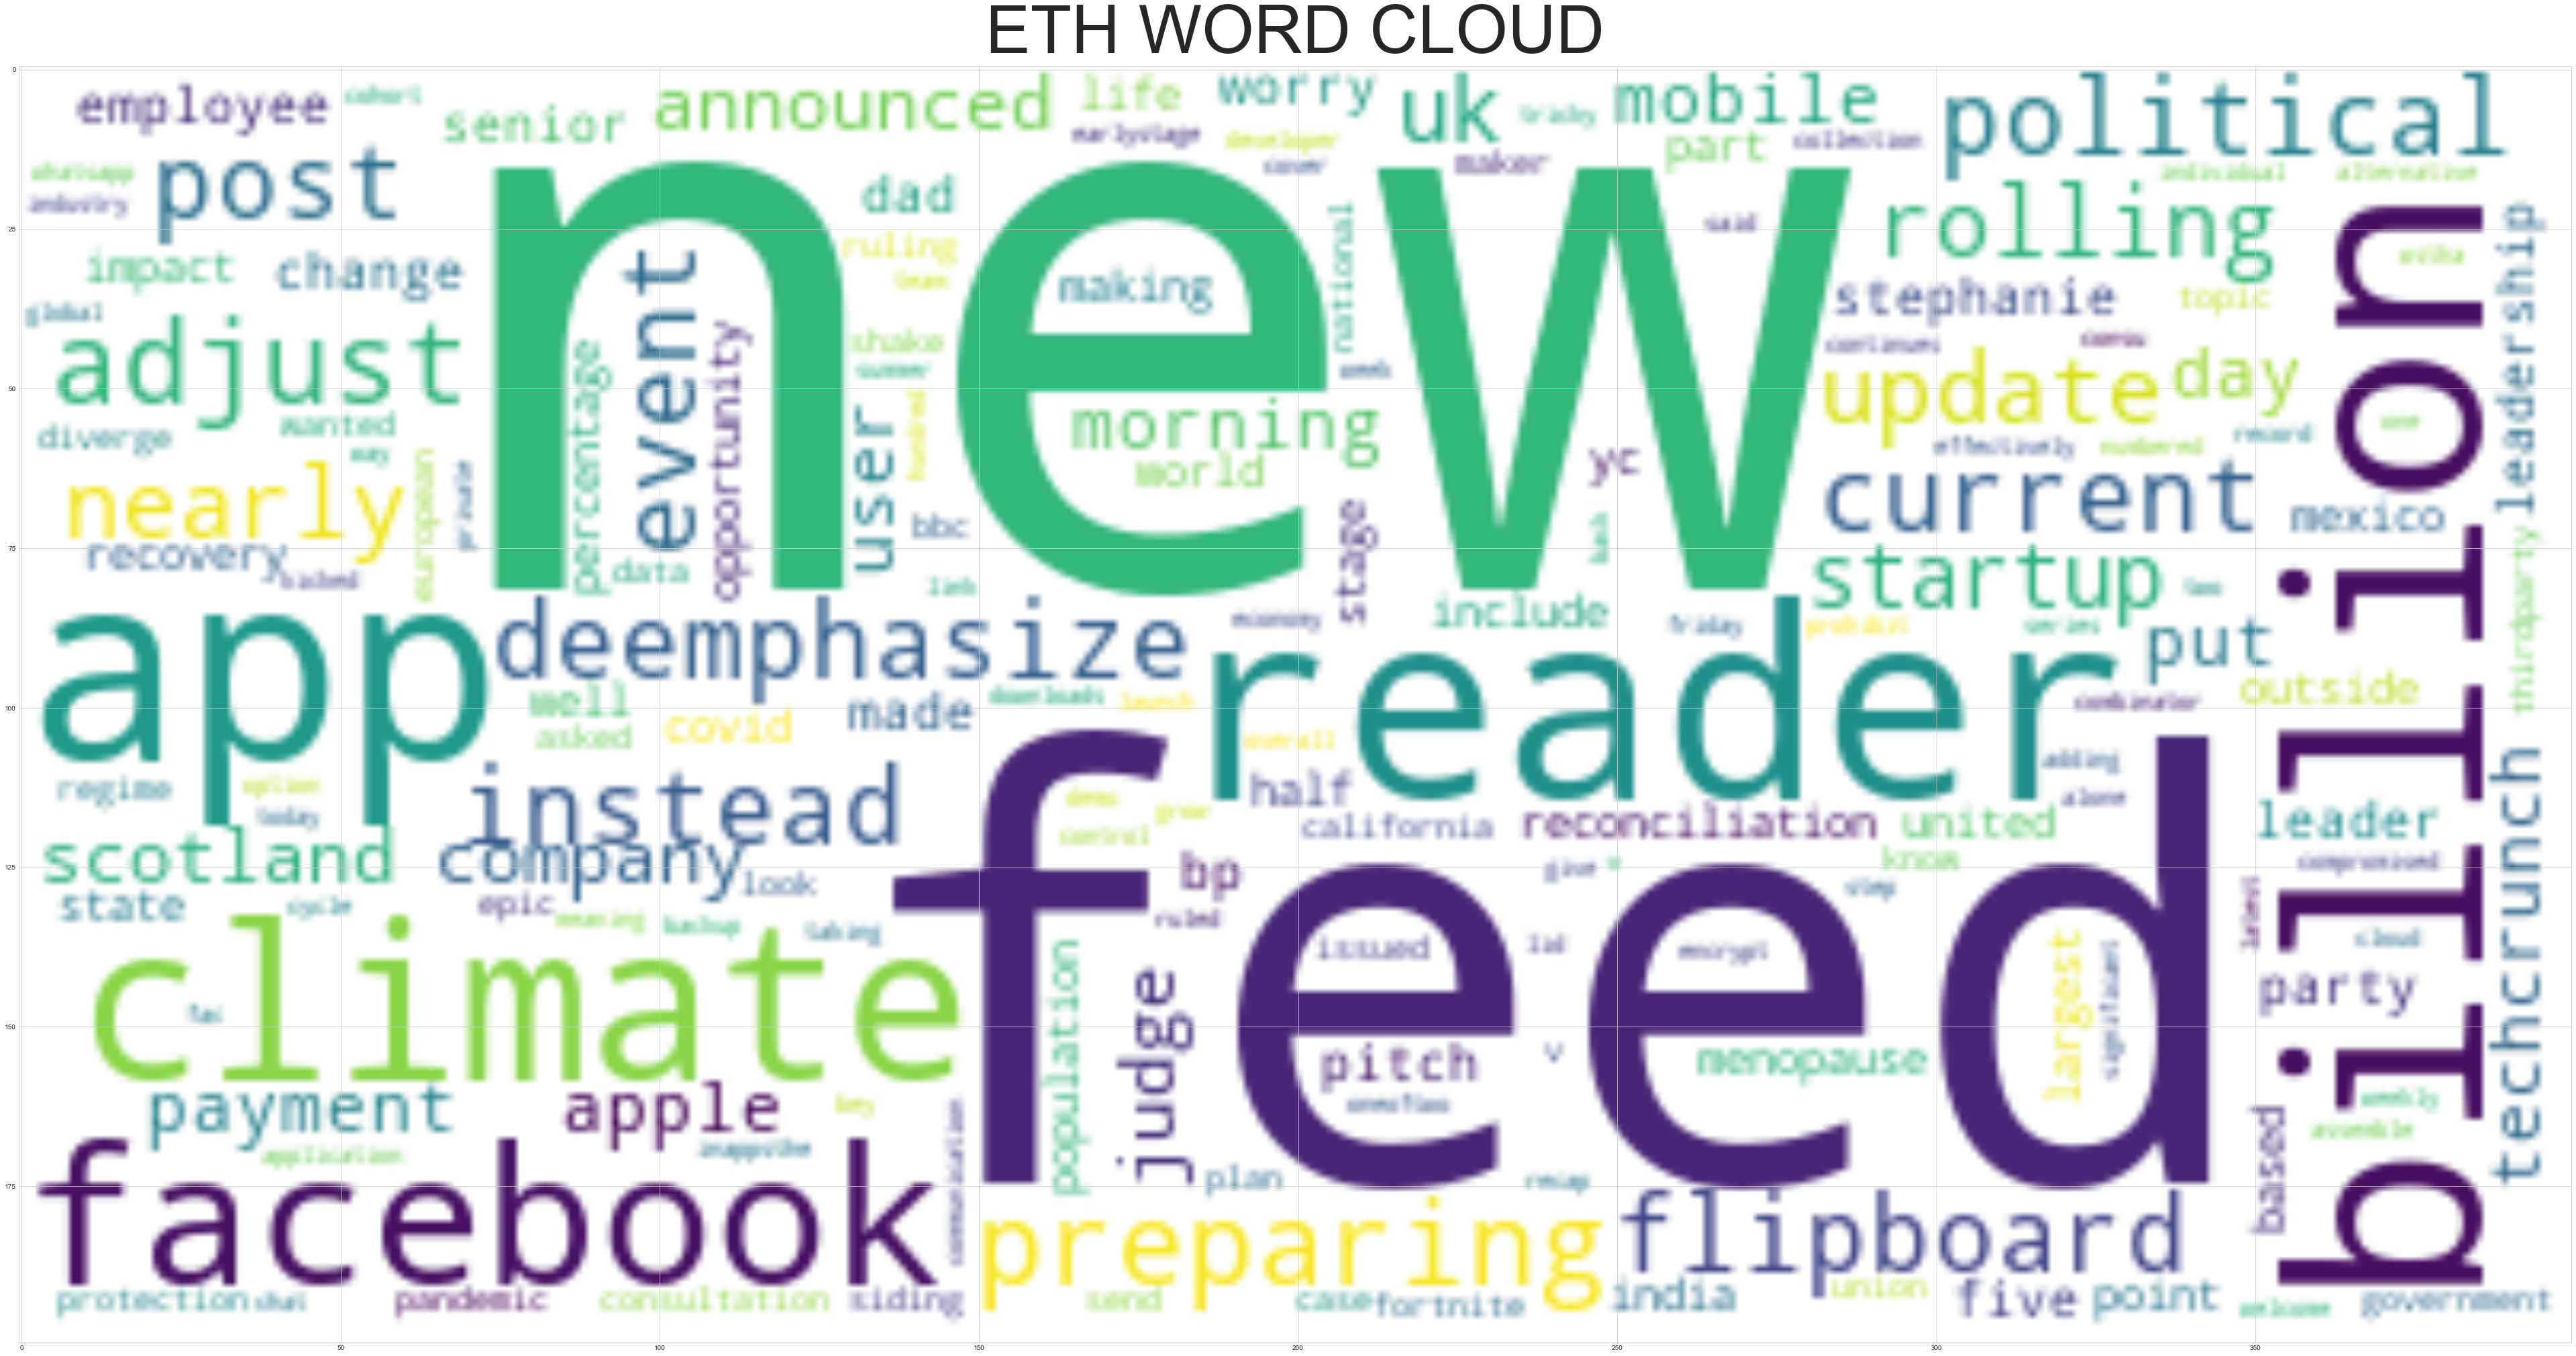

In [111]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_eth)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("ETH WORD CLOUD",fontsize=100)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [112]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [113]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [140]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
concat_btc = bitcoin_articles['description'].str.cat(sep=', ')
concat_btc

"Stephanie worries about climate change, but her dad is a senior employee at BP., Facebook is preparing to adjust its News Feed to de-emphasize political posts and current events, but news reader Flipboard is instead rolling out an update ..., Five party leaders made their pitch on leadership, climate, reconciliation and Covid recovery., Now, that will include menopause, as well -- a life stage that will impact nearly half the world's population at some point, but where opportunities there..., Nearly 50% of YC startups are based outside of the United States, with India, U.K. and Mexico making up the largest part of that percentage.  The company..., The U.K. government has announced a consultation on plans to shake up the national data protection regime, as it looks at how to diverge from European Union ..., BBC Scotland asked readers to send in what they wanted to know about the pandemic in Scotland., A judge this morning issued a ruling in California’s Epic v. Apple case, siding with 

In [141]:
# Run the NER processor on all of the text
doc = nlp(concat_btc)
# Add a title to the document
doc.user_data["title"] = "BTC NER WORD CLOUD"

In [142]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [144]:
# List all Entities
# YOUR CODE HERE!
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('Stephanie', 'ORG'),
 ('BP', 'ORG'),
 ('Facebook', 'ORG'),
 ('Flipboard', 'PERSON'),
 ('Five', 'CARDINAL'),
 ('Covid', 'NORP'),
 ('nearly half', 'CARDINAL'),
 ('Nearly 50%', 'PERCENT'),
 ('YC', 'ORG'),
 ('the United States', 'GPE'),
 ('India', 'GPE'),
 ('U.K.', 'GPE'),
 ('Mexico', 'GPE'),
 ('U.K.', 'GPE'),
 ('European Union', 'ORG'),
 ('BBC', 'ORG'),
 ('Scotland', 'GPE'),
 ('Scotland', 'GPE'),
 ('California', 'GPE'),
 ('Apple', 'ORG'),
 ('Fortnite', 'ORG'),
 ('third', 'ORDINAL'),
 ('Apple', 'ORG'),
 ('Facebook', 'ORG'),
 ('Flipboard', 'PERSON'),
 ('this morning', 'TIME'),
 ('WhatsApp', 'ORG'),
 ('Friday', 'DATE'),
 ('two billion', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('app', 'ORG'),
 ('Fac', 'PERSON'),
 ('This Week', 'DATE'),
 ('Apps', 'GPE'),
 ('TechCrunch', 'ORG'),
 ('OS', 'GPE'),
 ('app', 'ORG'),
 ('$143 billion', 'MONEY'),
 ('Today', 'DATE'),
 ('Y Combinator', 'PERSON'),
 ('Demo Day', 'EVENT'),
 ('Summer 2021', 'DATE'),
 ('day one-of-two', 'DATE'),
 ('hundreds', 'CARDINAL'),
 ('Te

---

### Ethereum NER

In [145]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
concat_eth = ethereum_articles['description'].str.cat(sep=', ')
concat_eth

"Stephanie worries about climate change, but her dad is a senior employee at BP., Facebook is preparing to adjust its News Feed to de-emphasize political posts and current events, but news reader Flipboard is instead rolling out an update ..., Five party leaders made their pitch on leadership, climate, reconciliation and Covid recovery., Now, that will include menopause, as well -- a life stage that will impact nearly half the world's population at some point, but where opportunities there..., Nearly 50% of YC startups are based outside of the United States, with India, U.K. and Mexico making up the largest part of that percentage.  The company..., The U.K. government has announced a consultation on plans to shake up the national data protection regime, as it looks at how to diverge from European Union ..., BBC Scotland asked readers to send in what they wanted to know about the pandemic in Scotland., A judge this morning issued a ruling in California’s Epic v. Apple case, siding with 

In [146]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc1 = nlp(concat_eth)
doc1.user_data["title"] = "ETH NER WORD CLOUD"
# Add a title to the document
# YOUR CODE HERE!
doc1.user_data["title"] = "ETH NER WORD CLOUD"

In [147]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc1, style='ent')

In [148]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc1.ents])

[('Stephanie', 'ORG'),
 ('BP', 'ORG'),
 ('Facebook', 'ORG'),
 ('Flipboard', 'PERSON'),
 ('Five', 'CARDINAL'),
 ('Covid', 'NORP'),
 ('nearly half', 'CARDINAL'),
 ('Nearly 50%', 'PERCENT'),
 ('YC', 'ORG'),
 ('the United States', 'GPE'),
 ('India', 'GPE'),
 ('U.K.', 'GPE'),
 ('Mexico', 'GPE'),
 ('U.K.', 'GPE'),
 ('European Union', 'ORG'),
 ('BBC', 'ORG'),
 ('Scotland', 'GPE'),
 ('Scotland', 'GPE'),
 ('California', 'GPE'),
 ('Apple', 'ORG'),
 ('Fortnite', 'ORG'),
 ('third', 'ORDINAL'),
 ('Apple', 'ORG'),
 ('Facebook', 'ORG'),
 ('Flipboard', 'PERSON'),
 ('this morning', 'TIME'),
 ('WhatsApp', 'ORG'),
 ('Friday', 'DATE'),
 ('two billion', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('app', 'ORG'),
 ('Fac', 'PERSON'),
 ('This Week', 'DATE'),
 ('Apps', 'GPE'),
 ('TechCrunch', 'ORG'),
 ('OS', 'GPE'),
 ('app', 'ORG'),
 ('$143 billion', 'MONEY'),
 ('Today', 'DATE'),
 ('Y Combinator', 'PERSON'),
 ('Demo Day', 'EVENT'),
 ('Summer 2021', 'DATE'),
 ('day one-of-two', 'DATE'),
 ('hundreds', 'CARDINAL'),
 ('Te

---